### data description

There are 4 restaurants using this food ordering application and information in the data includes

user_id: what customer made the order 

food_name: Name of food the customer bought

food_category: what category the food bought belongs to an the restaurants menu

food_price: how much the food ordered cost

Restaurant: what restaurant the customer ordered from

Rating: what rating the customer gave the meal

Review: review the customer gave

food_description: the description on the meal ordered

restaurant_location: where the restaurant is at, either on the mainland or island




In [7]:
import random

import csv
import random
import numpy as np

# Restaurant and food information
restaurants = [
    {
        "name": "Naija Delights",
        'loc':'Mainland',
        "categories": {
            "Starters and Appetizers": {
                "Puff Puff": 300,
                "Chicken Suya Skewers": 500,
                "Plantain Chips": 200,
                "Spring Rolls": 400
            },
            "Main Courses": {
                "Jollof Rice with Grilled Chicken": 1500,
                "Egusi Soup with Pounded Yam": 1200,
                "Fried Rice with Beef Stir-Fry": 1800,
                "Amala with Ewedu Soup and Assorted Meats": 1500
            },
            "Soups and Stews": {
                "Ogbono Soup with Semolina": 1200,
                "Efo Riro with Fufu": 1500,
                "Afang Soup with Garri": 1500,
                "Banga Soup with Starch": 1800
            },
            "Rice and Grains": {
                "Coconut Rice with Fried Plantain": 1500,
                "Ofada Rice with Ayamase Sauce": 1800,
                "Jollof Spaghetti": 1200,
                "Fried Rice with Grilled Fish": 1800
            },
            "Nigerian Delicacies": {
                "Moi Moi with Steamed Beans": 500,
                "Akara (Bean Cake) with Bread": 600,
                "Ewa Agoyin with Agege Bread": 800,
                "Nkwobi": 1500
            },
            "Drinks and Beverages": {
                "Chapman (drink)": 600,
                "Zobo Drink": 400,
                "Fresh Palm Wine": 800,
                "Nigerian Breweries Lager Beer": 500
            },
            "Desserts": {
                "Chin Chin": 300,
                "Coconut Candy": 200,
                "Ice Cream": 1200,
                "Sweet Plantain Fritters": 400
            }
        }
    },
    {
        "name": "Suya Palace",
        'loc':'Mainland',
        "categories": {
            "Starters and Sides": {
                "Peppered Snails": 1500,
                "Plantain Chips with Suya Dip": 800,
                "Moi Moi (Steamed Bean Pudding)": 500,
                "Akara (Bean Cake)": 300
            },
            "Grilled Meats": {
                "Beef Suya Skewers": 1200,
                "Chicken Suya Skewers": 1000,
                "Fish Suya Skewers": 1500,
                "Assorted Suya Platter (Beef, Chicken, Fish)": 3500
            },
            "Nigerian Specialties": {
                "Jollof Rice with Grilled Chicken": 2000,
                "Egusi Soup with Pounded Yam": 1800,
                "Efo Riro (Vegetable Stew) with Amala": 2200,
                "Ofada Rice and Stew with Assorted Meats": 2500
            },
            "Vegetarian Delights": {
                "Veggie Suya Skewers": 800,
                "Nigerian Salad": 1000,
                "Grilled Plantain with Spicy Sauce": 700,
                "Vegetable Stir-Fry": 1200
            },
            "Desserts and Beverages": {
                "Puff Puff": 300,
                "Chapman (Non-Alcoholic Cocktail)": 800,
                "Zobo (Hibiscus) Drink": 500,
                "Ice Cream (Vanilla, Chocolate, Strawberry)": 700
            }
        }
    },
    {
        "name": "Taste of Lagos",
        'loc':'Island',
        "categories": {
            "Appetizers": {
                "Chicken Wings": 1500,
                "Peppered Snails": 2000,
                "Plantain Chips": 500
            },
            "Soups and Stews": {
                "Egusi Soup with Pounded Yam": 2500,
                "Ogbono Soup with Eba": 2200,
                "Afang Soup with Fufu": 2800
            },
            "Rice and Swallows": {
                "Jollof Rice with Grilled Chicken": 3000,
                "Fried Rice with Beef Stir-Fry": 2500,
                "Amala with Ewedu and Gbegiri Soup": 2200
            },
            "Grilled Specialties": {
                "Suya Platter (Beef, Chicken, and Innards)": 3500,
                "Grilled Fish with Plantain": 3000,
                "Barbecue Ribs with Coleslaw": 3200
            },
            "Seafood Delights": {
                "Prawn Stir-Fry with Rice": 3500,
                "Fisherman's Soup with Eba": 3200,
                "Coconut Curry Shrimp": 3800
            },
            "Vegetarian Dishes": {
                "Vegetable Stir-Fry with Rice": 2500,
                "Plantain and Beans Porridge": 2200,
                "Okra Soup with Garri": 2800
            },
            "Desserts": {
                "Chocolate Cake": 1500,
                "Fruit Salad": 1200,
                "Ice Cream Sundae": 1800
            }
        }
    },
    {
        "name": "Taste of Nigeria",
        'loc':'Island',
        "categories": {
            "Nigerian Soups and Stews": {
                "Egusi Soup with Pounded Yam": 1500,
                "Ogbono Soup with Eba": 1800,
                "Vegetable Soup with Amala": 1700
            },
            "Rice Dishes": {
                "Jollof Rice with Grilled Chicken": 2000,
                "Fried Rice with Beef Stir-Fry": 2500,
                "Coconut Rice with Grilled Fish": 2200
            },
            "Local Delicacies": {
                "Suya (Beef Skewers)": 2500,
                "Ofada Rice with Assorted Meats": 2800,
                "Efo Riro with Ewedu and Semo": 2000
            },
            "Grilled Specialties": {
                "Grilled Fish with Plantain and Veggies": 2500,
                "BBQ Chicken Wings with French Fries": 1800,
                "Grilled Beef Skewers with Spicy Sauce": 2200
            },
            "Vegetarian Options": {
                "Veggie Stir-Fry with Rice or Noodles": 1500,
                "Bean Porridge with Plantain": 1700,
                "Okra Soup with Fufu": 1800
            },
            "Desserts": {
                "Nigerian Puff Puff (Deep-Fried Dough Balls)": 500,
                "Plantain Mosa (Sweet Plantain Fritters)": 600,
                "Coconut Candy": 400
            }
        }
    }
]




#random reviews to select from
positive_reviews = [
    "Delicious food! Loved the flavors.",
    "Great service and quality. Highly recommend.",
    "Amazing experience. Will definitely order again.",
    "Good portion size and value for money.",
    "Fresh ingredients and authentic taste."
]
negative_reviews = [
    "Food was cold and tasteless. Disappointed.",
    "Slow delivery and poor customer service.",
    "Overpriced for the quality received.",
    "Food arrived late and order was incorrect.",
    "Unappetizing presentation. Won't order again."
]

#description of each food
description =  {
    "Puff Puff": "Puff Puff is a popular Nigerian snack made from a simple batter of flour, sugar, yeast, and water. It is deep-fried until golden brown and has a fluffy, doughnut-like texture.",
    "Chicken Suya Skewers": "Chicken Suya Skewers are grilled chicken skewers marinated in a spicy peanut-based sauce called Suya spice. They are flavorful, smoky, and often served with sliced onions and tomatoes.",
    "Plantain Chips": "Plantain Chips are thinly sliced plantains that are deep-fried until crispy. They are a popular snack in Nigeria, enjoyed on their own or with dips and sauces.",
    "Spring Rolls": "Spring Rolls are crispy pastry rolls filled with a mixture of vegetables, meat, or seafood. They are deep-fried until golden and are often served as appetizers or snacks.",
    "Jollof Rice with Grilled Chicken": "Jollof Rice is a flavorful one-pot rice dish cooked with tomatoes, onions, and a blend of spices. It is often served with grilled chicken, which adds a smoky and delicious flavor.",
    "Egusi Soup with Pounded Yam": "Egusi Soup is a rich and thick soup made with ground melon seeds and various vegetables. It is typically served with Pounded Yam, a smooth and dough-like staple made from yam.",
    "Fried Rice with Beef Stir-Fry": "Fried Rice is a stir-fried rice dish cooked with vegetables, eggs, and a variety of seasonings. It is often served with beef stir-fry, which includes thinly sliced beef cooked with spices and vegetables.",
    "Amala with Ewedu Soup and Assorted Meats": "Amala is a Nigerian swallow made from yam flour. It is typically served with Ewedu Soup, a slimy and green soup made from jute leaves, and assorted meats such as beef, goat meat, or offal.",
    "Ogbono Soup with Semolina": "Ogbono Soup is a thick and hearty soup made from ground ogbono seeds, palm oil, and various meats or fish. It is commonly eaten with Semolina, a grain-like food made from durum wheat.",
    "Efo Riro with Fufu": "Efo Riro is a Nigerian vegetable stew made with assorted vegetables, palm oil, and various types of meat or fish. It is often served with Fufu, a starchy accompaniment made from cassava or yam.",
    "Afang Soup with Garri": "Afang Soup is a nutritious Nigerian soup made with Afang leaves, palm oil, and a variety of meats or fish. It is typically eaten with Garri, a granular food made from cassava.",
    "Banga Soup with Starch": "Banga Soup, also known as Ofe Akwu, is a traditional Nigerian soup made with palm fruit extract, assorted meats or fish, and spices. It is commonly eaten with Starch, a soft and gelatinous accompaniment made from cassava.",
    "Coconut Rice with Fried Plantain": "Coconut Rice is a flavorful rice dish cooked with coconut milk and spices. It is often served with fried plantain, which adds a sweet and caramelized flavor to the meal.",
    "Ofada Rice with Ayamase Sauce": "Ofada Rice is a locally-grown Nigerian rice variety with a unique flavor. It is typically served with Ayamase Sauce, a spicy stew made from green bell peppers, locust beans, and assorted meats.",
    "Jollof Spaghetti": "Jollof Spaghetti is a delicious variation of the popular Jollof Rice dish, where spaghetti noodles are cooked in a flavorful tomato-based sauce with spices, vegetables, and sometimes meat or fish.",
    "Fried Rice with Grilled Fish": "Fried Rice is a stir-fried rice dish cooked with vegetables, eggs, and a variety of seasonings. It is often served with grilled fish, which adds a smoky and savory element to the meal.",
    "Moi Moi with Steamed Beans": "Moi Moi is a Nigerian steamed bean pudding made from blended beans, onions, peppers, and spices. It is a protein-rich dish often enjoyed as a snack or as part of a main meal.",
    "Akara (Bean Cake) with Bread": "Akara, also known as Bean Cake or Bean Fritters, is a popular Nigerian street food made from deep-fried bean batter. It is often served with bread and can be enjoyed for breakfast or as a snack.",
    "Ewa Agoyin with Agege Bread": "Ewa Agoyin is a spicy Nigerian bean stew made with cooked beans and a special sauce made from palm oil, onions, and peppers. It is typically served with Agege Bread, a soft and fluffy bread popular in Nigeria.",
    "Nkwobi": "Nkwobi is a traditional Nigerian delicacy made from cow foot cooked in a spicy sauce. It is often served as a side dish or appetizer and is enjoyed with drinks.",
    "Chapman (drink)": "Chapman is a popular Nigerian non-alcoholic cocktail made with a mix of fruity and fizzy drinks, such as grenadine syrup, Fanta or Sprite, lemon or lime juice, and Angostura bitters. It is often garnished with slices of fruits and served over ice.",
    "Zobo Drink": "Zobo Drink is a refreshing Nigerian beverage made from dried hibiscus petals, ginger, and other spices. It is usually sweetened with sugar or natural sweeteners and served chilled.",
    "Fresh Palm Wine": "Fresh Palm Wine is a traditional Nigerian alcoholic beverage made from the sap of palm trees. It has a sweet and slightly sour taste and is commonly consumed in rural areas.",
    "Nigerian Breweries Lager Beer": "Nigerian Breweries Lager Beer is a popular beer brand in Nigeria. It is a light and refreshing lager with a crisp taste, often enjoyed during social gatherings or at bars.",
    "Chin Chin": "Chin Chin is a crunchy snack made from a dough of flour, sugar, milk, butter, and other flavorings. It is deep-fried until golden brown and can be enjoyed as a standalone snack or used as a topping for desserts.",
    "Coconut Candy": "Coconut Candy is a sweet treat made from shredded coconut, sugar, and flavorings. It is often shaped into bite-sized pieces and enjoyed as a snack or dessert.",
    "Sweet Plantain Fritters": "Sweet Plantain Fritters, also known as Dodo Ikire, are ripe plantains mashed and combined with flour, sugar, and spices. They are deep-fried until golden brown and have a sweet and crispy texture.",
    "Peppered Snails": "Peppered Snails are boiled or grilled snails seasoned with a spicy sauce made from peppers, onions, and other spices. They are often served as a delicacy or as part of a meal.",
    "Plantain Chips with Suya Dip": "Plantain Chips with Suya Dip are crispy plantain chips served with a dip made from Suya spice, which is a flavorful peanut-based seasoning mix. It is a popular snack or appetizer in Nigeria.",
    "Moi Moi (Steamed Bean Pudding)": "Moi Moi is a Nigerian steamed bean pudding made from blended beans, onions, peppers, and spices. It is a protein-rich dish often enjoyed as a snack or as part of a main meal.",
    "Akara (Bean Cake)": "Akara, also known as Bean Cake or Bean Fritters, is a popular Nigerian street food made from deep-fried bean batter. It is a savory and protein-rich snack or breakfast item.",
    "Beef Suya Skewers": "Beef Suya Skewers are grilled beef skewers marinated in a spicy peanut-based sauce called Suya spice. They are flavorful, smoky, and often served with sliced onions and tomatoes.",
    "Chicken Suya Skewers": "Chicken Suya Skewers are grilled chicken skewers marinated in a spicy peanut-based sauce called Suya spice. They are flavorful, smoky, and often served with sliced onions and tomatoes.",
    "Fish Suya Skewers": "Fish Suya Skewers are grilled fish skewers marinated in a spicy peanut-based sauce called Suya spice. They are flavorful, smoky, and often served with sliced onions and tomatoes.",
    "Assorted Suya Platter (Beef, Chicken, Fish)": "Assorted Suya Platter is a combination of grilled beef, chicken, and fish skewers marinated in Suya spice. It offers a variety of flavors and is often served with sliced onions and tomatoes.",
    "Jollof Rice with Grilled Chicken": "Jollof Rice is a flavorful one-pot rice dish cooked with tomatoes, onions, and a blend of spices. It is often served with grilled chicken, which adds a smoky and delicious flavor.",
    "Egusi Soup with Pounded Yam": "Egusi Soup is a rich and thick soup made with ground melon seeds and various vegetables. It is typically served with Pounded Yam, a smooth and dough-like staple made from yam.",
    "Efo Riro (Vegetable Stew) with Amala": "Efo Riro is a Nigerian vegetable stew made with assorted vegetables, palm oil, and various types of meat or fish. It is often served with Amala, a smooth and dough-like swallow made from yam or cassava.",
    "Ofada Rice and Stew with Assorted Meats": "Ofada Rice is a locally-grown Nigerian rice variety with a unique flavor. It is typically served with a spicy stew made from locust beans, assorted meats, and peppers.",
    "Veggie Suya Skewers": "Veggie Suya Skewers are grilled skewers made with a variety of vegetables, marinated in Suya spice. They are a flavorful and vegetarian-friendly option for those who enjoy the spicy Suya flavor.",
    "Nigerian Salad": "Nigerian Salad is a colorful and refreshing salad made with a combination of vegetables, fruits, and proteins such as boiled eggs and grilled chicken. It is often served as a side dish or appetizer.",
    "Grilled Plantain with Spicy Sauce": "Grilled Plantain with Spicy Sauce is a dish where ripe plantains are grilled until tender and served with a flavorful and spicy sauce. It combines the sweetness of the plantain with the heat of the sauce.",
    "Vegetable Stir-Fry": "Vegetable Stir-Fry is a dish made by stir-frying a mix of colorful and crunchy vegetables with spices and seasonings. It can be enjoyed on its own or served with rice or noodles.",
    "Puff Puff": "Puff Puff is a popular Nigerian snack made from a simple batter of flour, sugar, yeast, and water. It is deep-fried until golden brown and has a fluffy, doughnut-like texture.",
    "Chapman (Non-Alcoholic Cocktail)": "Chapman is a popular Nigerian non-alcoholic cocktail made with a mix of fruity and fizzy drinks, such as grenadine syrup, Fanta or Sprite, lemon or lime juice, and Angostura bitters. It is often garnished with slices of fruits and served over ice.",
    "Zobo (Hibiscus) Drink": "Zobo Drink is a refreshing Nigerian beverage made from dried hibiscus petals, ginger, and other spices. It is usually sweetened with sugar or natural sweeteners and served chilled.",
    "Ice Cream (Vanilla, Chocolate, Strawberry)": "Ice Cream is a frozen dessert enjoyed in various flavors, including vanilla, chocolate, and strawberry. It is a popular treat in Nigeria, often served on its own or as a topping for other desserts.",
    "Chicken Wings": "Chicken Wings are chicken wingettes and drumettes that are marinated and either baked, grilled, or fried until crispy and golden. They are often served as a snack or as part of a meal.",
    "Peppered Snails": "Peppered Snails are boiled or grilled snails seasoned with a spicy sauce made from peppers, onions, and other spices. They are often served as a delicacy or as part of a meal.",
    "Egusi Soup with Pounded Yam": "Egusi Soup is a rich and thick soup made with ground melon seeds and various vegetables. It is typically served with Pounded Yam, a smooth and dough-like staple made from yam.",
    "Ogbono Soup with Eba": "Ogbono Soup is a thick and hearty soup made from ground ogbono seeds, palm oil, and various meats or fish. It is commonly eaten with Eba, a dough-like accompaniment made from cassava.",
    "Afang Soup with Fufu": "Afang Soup is a nutritious Nigerian soup made with Afang leaves, palm oil, and a variety of meats or fish. It is typically eaten with Fufu, a starchy accompaniment made from cassava or yam.",
    "Jollof Rice with Grilled Chicken": "Jollof Rice is a flavorful one-pot rice dish cooked with tomatoes, onions, and a blend of spices. It is often served with grilled chicken, which adds a smoky and delicious flavor.",
    "Fried Rice with Beef Stir-Fry": "Fried Rice is a stir-fried rice dish cooked with vegetables, eggs, and a variety of seasonings. It is often served with beef stir-fry, which includes thinly sliced beef cooked with spices and vegetables.",
    "Amala with Ewedu and Gbegiri Soup": "Amala is a Nigerian swallow made from yam flour. It is typically served with Ewedu Soup, a slimy and green soup made from jute leaves, and Gbegiri Soup, a thick soup made from beans.",
    "Suya Platter (Beef, Chicken, and Innards)": "Suya Platter is a combination of grilled beef, chicken, and innards (offal) skewers marinated in Suya spice. It offers a variety of flavors and textures.",
    "Grilled Fish with Plantain": "Grilled Fish with Plantain is a dish where whole fish, seasoned with spices, is grilled until tender and served with ripe plantains. It is a flavorful and balanced meal.",
    "Barbecue Ribs with Coleslaw": "Barbecue Ribs with Coleslaw is a dish where pork ribs are marinated in a barbecue sauce, then grilled or baked until tender and caramelized. It is often served with coleslaw, a refreshing cabbage salad dressed in a creamy sauce.",
    "Prawn Stir-Fry with Rice": "Prawn Stir-Fry with Rice is a dish made by stir-frying prawns with a mix of vegetables, spices, and sauces. It is served with steamed rice and offers a flavorful combination of seafood and vegetables.",
    "Fisherman's Soup with Eba": "Fisherman's Soup is a spicy Nigerian soup made with a variety of seafood such as fish, prawns, and crabs. It is often enjoyed with Eba, a dough-like accompaniment made from cassava.",
    "Coconut Curry Shrimp": "Coconut Curry Shrimp is a dish where shrimp is cooked in a creamy coconut-based curry sauce with spices and herbs. It is served with rice or bread and offers a fusion of flavors.",
    "Vegetable Stir-Fry with Rice": "Vegetable Stir-Fry with Rice is a dish made by stir-frying a mix of colorful and crunchy vegetables with spices and seasonings. It is served with steamed rice and offers a nutritious and balanced meal.",
    "Plantain and Beans Porridge": "Plantain and Beans Porridge is a hearty dish made by cooking ripe plantains and beans together in a flavorful broth with spices and vegetables. It is a popular comfort food in Nigeria.",
    "Okra Soup with Garri": "Okra Soup is a popular Nigerian soup made with okra, palm oil, and various meats or fish. It is often enjoyed with Garri, a granular swallow made from cassava.",
    "Chocolate Cake": "Chocolate Cake is a rich and indulgent cake made with cocoa powder or melted chocolate. It is typically layered with chocolate frosting or ganache and enjoyed as a dessert for special occasions.",
    "Fruit Salad": "Fruit Salad is a refreshing and colorful dish made with a mix of fresh fruits, such as watermelon, pineapple, grapes, and berries. It is often served as a light and healthy dessert or snack.",
    "Ice Cream Sundae": "Ice Cream Sundae is a classic dessert made by layering scoops of ice cream with various toppings, such as chocolate sauce, whipped cream, nuts, and cherries. It is a sweet treat enjoyed by people of all ages.",
    "Vegetable Soup with Amala": "Vegetable Soup is a nutritious Nigerian soup made with a variety of vegetables, palm oil, and spices. It is typically served with Amala, a smooth and dough-like swallow made from yam or cassava.",
    "Coconut Rice with Grilled Fish": "Coconut Rice is a flavorful rice dish cooked with coconut milk, spices, and vegetables. It is often served with grilled fish, which complements the creamy and aromatic rice.",
    "Suya (Beef Skewers)": "Suya is a popular Nigerian street food made of grilled beef skewers marinated in a spicy peanut-based sauce. It is known for its smoky flavor and is often enjoyed as a snack or appetizer.",
    "Ofada Rice with Assorted Meats": "Ofada Rice is a locally-grown Nigerian rice variety with a unique flavor. It is typically served with a stew made from locust beans, assorted meats, and peppers, providing a rich and flavorful combination.",
    "Efo Riro with Ewedu and Semo": "Efo Riro is a Nigerian vegetable stew made with assorted vegetables, palm oil, and various types of meat or fish. It is often served with Ewedu Soup, a slimy and green soup made from jute leaves, and Semo, a swallow made from semolina flour.",
    "Grilled Fish with Plantain and Veggies": "Grilled Fish with Plantain and Veggies is a dish where whole fish, seasoned with spices, is grilled until tender and served with ripe plantains and a side of sautéed vegetables. It is a nutritious and well-rounded meal.",
    "BBQ Chicken Wings with French Fries": "BBQ Chicken Wings with French Fries is a dish where chicken wings are marinated in barbecue sauce, then grilled or baked until tender and caramelized. They are often served with crispy French fries, offering a combination of flavors and textures.",
    "Grilled Beef Skewers with Spicy Sauce": "Grilled Beef Skewers with Spicy Sauce are tender and flavorful beef skewers marinated in a spicy sauce. They are grilled to perfection and served with a tangy and spicy dipping sauce, making them a delicious and satisfying dish.",
    "Veggie Stir-Fry with Rice or Noodles": "Veggie Stir-Fry with Rice or Noodles is a dish made by stir-frying a variety of vegetables with spices and sauces. It can be enjoyed with either steamed rice or noodles, providing a versatile and satisfying meal option.",
    "Bean Porridge with Plantain": "Bean Porridge with Plantain is a hearty dish made by cooking beans in a flavorful broth with spices, vegetables, and ripe plantains. It is a nutritious and filling meal enjoyed in Nigeria.",
    "Okra Soup with Fufu": "Okra Soup is a popular Nigerian soup made with okra, palm oil, and various meats or fish. It is often enjoyed with Fufu, a starchy accompaniment made from cassava or yam, providing a comforting and satisfying meal.",
    "Nigerian Puff Puff (Deep-Fried Dough Balls)": "Nigerian Puff Puff is a popular street snack made from a simple batter of flour, sugar, yeast, and water. The dough is deep-fried until golden and puffs up into soft and fluffy balls, offering a delightful treat.",
    "Plantain Mosa (Sweet Plantain Fritters)": "Plantain Mosa, also known as Sweet Plantain Fritters, is a sweet and crispy snack made from ripe plantains mashed with flour and spices, then deep-fried until golden brown. It is a delicious treat enjoyed in Nigeria.",
    "Coconut Candy": "Coconut Candy is a sweet treat made from grated coconut, sugar, and flavorings. It is typically shaped into small bite-sized pieces and offers a delightful combination of coconut flavor and sweetness.",
    "Ice Cream":"Ice cream is a frozen dairy food made from cream or butterfat, milk, sugar, and flavourings"}


<IPython.core.display.Javascript object>

In [2]:
def generate_food_data(num_entries):
    data_entry = []
    
    #random seed for reproduceability
    random.seed(123)
    
    for _ in range(num_entries):
        data=random.choices([restaurant for restaurant in restaurants],[3,5,7,2])[0]
        restaurant = data.get('name')
        food_type = random.choice(list(data.get('categories').keys()))
        food_name = random.choice(list(data.get('categories')[food_type].keys()))
        user_id = random.randint(1000, 9999)
        food_price = data.get('categories')[food_type][food_name]
        

        rating = random.choices(np.arange(1, 6),[3,2,10,30,20])[0]
        
        if rating >= 3:
            review = random.choice(positive_reviews)
        else:
            review = random.choice(negative_reviews)
        
        food_description = description.get(food_name),
        restaurant_location=data.get('loc')
                                     
        entry = {
            'User_id': user_id,
            'Food_name': food_name,
            'Food_categories': food_type,
            'Food_price': food_price,
            'Restaurant': restaurant,
            'Rating': rating,
            'Review': review,
            'Food_description': food_description,
            'restaurant_location':restaurant_location
        }
        
        data_entry.append(entry)
    
    return data_entry

# Generate mock data entries
mock_data = generate_food_data(100000)

# Save data to CSV file
filename = 'mock_data.csv'
fieldnames = ['User_id','Food_name', 'Food_categories', 'Food_price', 'Restaurant', 'Rating', 'Review', 'Food_description','restaurant_location']

with open(filename, 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(mock_data)

print(f"Mock data saved to {filename}")

Mock data saved to mock_data.csv


______ the backend guys asked to share a product data_______  
Can we have a product data with about 10 categories and let's say 20 products in it.  
Categories should be simple like, drinks, snacks, food, breakfast etc  
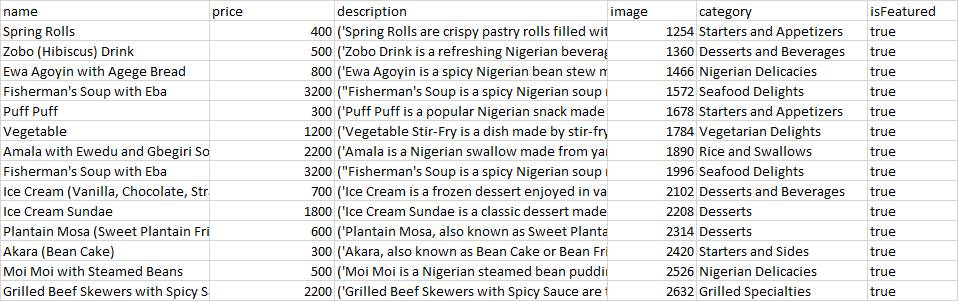

In [2]:
#!pip install nb_black
%load_ext nb_black

<IPython.core.display.Javascript object>

In [5]:
products = {"Breakfast": {
        "Plantain and Omelette": {
            "price": 140,
            "description": "Plantain and Omelette is a flavorful breakfast option that includes ripe plantains and a fluffy omelette."
        },
        "Yam and Egg": {
            "price": 200,
            "description": "Yam and Egg is a classic Nigerian breakfast dish consisting of boiled or fried yam served with scrambled or fried eggs."
        },
        "Indomie and egg": {
            "price": 250,
            "description": "Indomie is an extremely popular instant noodle brand in Nigeria. People can get very creative when preparing Indomie, and usually pair it with fried or boiled egg."
        },
        "Pap and Akara": {
            "price": 200,
            "description": "Pap and Akara is a popular Nigerian breakfast combination, featuring soft pap (a porridge made from corn or rice) served with akara (bean cakes)."
        },
        "Bread and Tea": {
            "price": 150,
            "description": "Bread and Tea is a simple and common Nigerian breakfast option, with sliced bread served alongside a cup of hot tea or coffee."
        },
        "Pancake": {
            "price": 200,
            "description": "Pancakes are another staple breakfast dish in Nigeria. Most children love pancakes. There is also the Nigerian pancake called Diet."
        },
         "Moin Moin and Bread": {
            "price": 16,
            "description": "Moin Moin and Bread is a traditional Nigerian breakfast pairing of steamed bean pudding (moin moin) and slices of bread."
        },
        "Fried Plantain and Eggs": {
            "price": 14,
            "description": "Fried Plantain and Eggs is a delightful breakfast choice with ripe fried plantains served alongside scrambled or fried eggs."
        },
        "Boiled Plantains  and pepper sauce": {
            "price": 200,
            "description": "Boiled plantains and pepper sauce make a delicious and flavorful combination. The boiled plantains provide a starchy and slightly sweet base, while the spicy and tangy pepper sauce adds a zesty kick to the meal."
        },
        "Okpa and custard": {
            "price": 100,
            "description": "Okpa is the local name for Bambara nuts. It is also the name of the boiled pudding made with the Bambara nut powder."
        }
    },
    "Soups": {
        "Egusi Soup": {
            "price": 700,
            "description": "Egusi Soup is a rich and hearty Nigerian soup made from ground melon seeds, vegetables, and often enjoyed with pounded yam or eba."
        },
        "Okra Soup": {
            "price": 650,
            "description": "Okra Soup is a popular Nigerian soup made from fresh okra, meat or seafood, and flavored with spices like crayfish and bouillon cubes."
        },
        "Efo Riro": {
            "price": 600,
            "description": "Efo Riro is a delicious Nigerian vegetable soup made with assorted meats, leafy greens, and a flavorful blend of spices."
        },
        "Ogbono Soup": {
            "price": 650,
            "description": "Ogbono Soup, also known as Draw Soup, is a Nigerian soup made from ground ogbono seeds, meats, and vegetables."
        },
        "Edikaikong Soup": {
            "price": 750,
            "description": "Edikaikong Soup is a nutritious Nigerian soup made with a combination of ugwu (pumpkin leaves) and water leaves, assorted meats, and fish."
        },
        "Bitter Leaf Soup": {
            "price": 700,
            "description": "Bitter Leaf Soup is a traditional Nigerian soup made from bitter leaves, assorted meats, and fish. It has a slightly bitter taste."
        },
        "Bangaa Soup": {
            "price": 800,
            "description": "Bangaa Soup is a spicy and flavorful Nigerian soup made from catfish or any other suitable fish, spices, and vegetables."
        },
        "Ofe Nsala": {
            "price": 750,
            "description": "Ofe Nsala, also known as White Soup, is a delicious Nigerian soup made with catfish, utazi leaves, and other ingredients."
        },
        "Pepper Soup": {
            "price": 700,
            "description": "Pepper Soup is a spicy Nigerian soup made with assorted meats or fish, flavored with aromatic spices like uziza seeds and scent leaves."
        },
        "Miyan Kuka": {
            "price": 750,
            "description": "Miyan Kuka is a traditional Nigerian soup made from powdered baobab leaves, meat, and spices. It is popular in Northern Nigeria."
        }
    },
    "Rice Dishes": {
        "Jollof Rice": {
            "price": 500,
            "description": "Jollof Rice is a popular Nigerian dish made with rice, tomatoes, onions, and a blend of spices, resulting in a flavorful one-pot meal."
        },
        "Fried Rice": {
            "price": 550,
            "description": "Fried Rice is a tasty Nigerian dish made with rice, vegetables, and seasoned with spices. It is often served with chicken, beef, or shrimp."
        },
        "Coconut Rice": {
            "price": 600,
            "description": "Coconut Rice is a flavorful Nigerian dish where rice is cooked in coconut milk, resulting in a rich and aromatic rice dish."
        },
        "Native Jollof Rice": {
            "price": 550,
            "description": "Native Jollof Rice is a traditional Nigerian rice dish cooked with local spices, palm oil, and other ingredients, giving it a distinct taste."
        },
        "Ofada Rice and Sauce": {
            "price": 650,
            "description": "Ofada Rice and Sauce is a Nigerian specialty dish made with locally grown Ofada rice and a flavorful sauce made from assorted meats and vegetables."
        },
        "Banga Rice": {
            "price": 600,
            "description": "Banga Rice is a delicious Nigerian rice dish cooked with palm fruit extract, spices, and served with assorted meats or fish."
        },
        "Party Jollof Rice": {
            "price": 550,
            "description": "Party Jollof Rice is a flavorful and well-seasoned version of Jollof Rice often served at celebrations and special occasions."
        },
        "Native Fried Rice": {
            "price": 600,
            "description": "Native Fried Rice is a Nigerian variation of Fried Rice cooked with indigenous ingredients and flavors, giving it a unique taste."
        },
        "Yam and Fried Rice": {
            "price": 550,
            "description": "Yam and Fried Rice is a combination dish where fried rice is served with boiled or fried yam, creating a satisfying meal."
        },
        "Egg Fried Rice": {
            "price": 500,
            "description": "Egg Fried Rice is a simple and flavorful Nigerian rice dish cooked with scrambled eggs, vegetables, and spices."
        }
    },
"Swallows": {
        "Amala with Ewedu and Gbegiri": {
            "price": 22,
            "description": "Amala with Ewedu and Gbegiri is a traditional Nigerian swallow meal consisting of dark yam flour (amala) served with Ewedu soup (made from jute leaves) and Gbegiri soup (made from beans)."
        },
        "Eba with Egusi Soup": {
            "price": 20,
            "description": "Eba with Egusi Soup is a popular Nigerian swallow combination that includes garri (cassava flour) served with a rich and flavorful egusi soup made from ground melon seeds."
        },
        "Pounded Yam with Ogbono Soup": {
            "price": 22,
            "description": "Pounded Yam with Ogbono Soup is a classic Nigerian swallow meal featuring smooth pounded yam served with ogbono soup made from ground ogbono seeds."
        },
        "Semo with Okra Soup": {
            "price": 18,
            "description": "Semo with Okra Soup is a common Nigerian swallow choice that pairs semolina flour with a tasty okra soup, made from fresh okra and other ingredients."
        },
        "Fufu with Afang Soup": {
            "price": 24,
            "description": "Fufu with Afang Soup is a traditional Nigerian swallow meal made from cassava or plantain flour, served with Afang soup (made from a blend of vegetables and assorted meats)."
        },
        "Iyan (Pounded Yam) with Efo Riro": {
            "price": 22,
            "description": "Iyan (Pounded Yam) with Efo Riro is a classic Nigerian swallow combination of smooth pounded yam served with Efo Riro, a delicious soup made from a variety of vegetables and meats."
        },
        "Garri with Egusi Soup": {
            "price": 20,
            "description": "Garri with Egusi Soup is a simple and satisfying Nigerian swallow meal that includes garri (cassava flakes) served with egusi soup made from ground melon seeds."
        },
        "Semovita with Edikang Ikong Soup": {
            "price": 24,
            "description": "Semovita with Edikang Ikong Soup is a popular Nigerian swallow pairing that includes semolina flour served with Edikang Ikong Soup, a nutritious soup made from a combination of ugwu (pumpkin) leaves and waterleaf."
        },
        "Oat Swallow with Vegetable Soup": {
            "price": 20,
            "description": "Oat Swallow with Vegetable Soup is a healthy and gluten-free Nigerian swallow option made from ground oats, served with a flavorful vegetable soup."
        },
        "Tuwo Shinkafa with Miyan Kuka": {
            "price": 24,
            "description": "Tuwo Shinkafa with Miyan Kuka is a traditional Northern Nigerian swallow dish made from rice flour (tuwo shinkafa), served with Miyan Kuka, a soup made from powdered baobab leaves."
        }
    },
    "snacks":{
        "Chips":{
            "price": 950,
            "description": "Salty and crispy potato chips."
   },
        "Cookies":{
            "price":  150,
            "description": "Sweet and crunchy baked cookies."
        },
        "Popcorn":{
            "price": 500,
            "description": "Light and fluffy popped corn kernels."
 },
        "Nuts":{
            "price":  100,
            "description": "Roasted and salted nuts, such as almonds or peanuts."
        },
        "Crackers":{
            "price": 250,
            "description": "Crisp and savory baked crackers."
        },
        "Cheese Puffs":{
            "price": 200,
            "description": "Cheesy and puffy snacks made with cornmeal."
        },
        "Fruit Snacks":{
            "price": 550,
            "description": "Chewy and fruity snacks in fun shapes."
              },
        "Beef Jerky":{
            "price":  900,
            "description": "Dried and seasoned strips of beef or other meats."
        },
        "Rice Cakes":{
            "price": 650,
            "description": "Light and airy cakes made from rice grains."
        },
        "Peanut Butter Cups":{
            "price": 1000,
            "description": "Creamy peanut butter cups with a chocolate coating."
        }
    },
     "desserts":{
        "Chocolate Cake":{
            "price": 850,
            "description": "Rich and moist chocolate cake layered with chocolate ganache or frosting."
        },
        "Apple Pie":{
            "price":  1500,
            "description": "A classic pie made with sweet apples and a flaky crust."
        },
        "Cheesecake":{
            "price":  900,
            "description": "A creamy and indulgent cake made with cream cheese, eggs, and a cookie crust."
        },
        "Ice Cream Sundae":{
            "price": 950,
            "description": "A delightful treat with scoops of ice cream, toppings, and sauces."
        },
        "Brownies":{
            "price": 500,
            "description": "Decadent and fudgy chocolate squares, often with nuts or chocolate chips."
        },
        "Cupcakes":{
            "price": 250,
            "description": "Individual cakes with various flavors and frosting designs."
        },
"Strawberry Shortcake":{
            "price": 1700,
            "description": "A classic dessert made with fresh strawberries, sponge cake, and whipped cream."
        },
        "Creme Brulee":{
            "price": 350,
            "description": "A creamy custard topped with caramelized sugar for a crunchy and sweet layer."
        },
        "Chocolate Chip Cookies":{
            "price": 1050,
            "description": "Delicious cookies with chocolate chips throughout."
        },
 "Red Velvet Cake":{
            "price": 1200,
            "description": "A velvety and vibrant red cake with cream cheese frosting."
        }
     },
      "Drinks":{
        "Coffee":{
            "price": 750,
            "description":     "A classic hot beverage made from roasted coffee beans.",
        },
 "Orange Juice":{
            "price": 900,
            "description": "A refreshing citrus drink extracted from oranges."
        },
        "Lemonade":{
            "price": 650,
            "description": "A tangy and sweet lemon-flavored drink."
        },
        "Iced Tea":{
            "price": 500,
            "description": "Chilled tea served with ice, often with added sweeteners and flavors."
        },
        "Mango Smoothie":{
            "price": 650,
            "description": "A fruity blended drink made with ripe mangoes and ice."
        },
        "Hot Chocolate":{
            "price": 950,
            "description": "A comforting and creamy hot beverage made with cocoa and milk."
        },
        "Apple Cider":{
            "price": 1250,
            "description": "A spiced and warm drink made from apple juice or cider."
        },
        "Ginger Ale":{
            "price": 500,
            "description": "A carbonated soft drink flavored with ginger."
        },
        "Chai Latte":{
            "price": 350,
            "description": "A spiced tea latte made with black tea, milk, and aromatic spices."
        },
    "Watermelon Slush":{
            "price": 350,
            "description": "A slushy and cooling drink made from fresh watermelon and ice."
    }
},   "Chinese Cuisine": {
        "Fried Rice": {
            "price": 800,
            "description": "Stir-fried rice with vegetables, eggs, and sometimes meat or seafood."
        },
        "Sweet and Sour Chicken": {
            "price": 1000,
            "description": "Crispy chicken in a tangy and sweet sauce with bell peppers and pineapple."
        },
        "Beef in Oyster Sauce": {
            "price": 1200,
            "description": "Tender beef stir-fried with vegetables in a savory oyster sauce."
        },
        "Spring Rolls": {
            "price": 500,
            "description": "Crispy fried rolls filled with vegetables and sometimes meat or seafood."
        },
        "Chow Mein": {
            "price": 900,
            "description": "Stir-fried noodles with vegetables and meat or seafood."
        },
        "Szechuan Chicken": {
            "price": 1100,
            "description": "Spicy and flavorful chicken stir-fried with Szechuan peppercorns and chili peppers."
        },
        "Peking Duck": {
            "price": 2000,
            "description": "Roasted duck with crispy skin, served with pancakes, scallions, and hoisin sauce."
        },
        "Egg Fried Rice": {
            "price": 800,
            "description": "Fried rice cooked with scrambled eggs, vegetables, and sometimes meat or seafood."
        },
        "Kung Pao Chicken": {
            "price": 1000,
            "description": "Chicken stir-fried with peanuts, vegetables, and a spicy, savory sauce."
        },
        "Hot and Sour Soup": {
            "price": 700,
            "description": "A spicy and tangy soup with mushrooms, tofu, vegetables, and sometimes meat."
        }
    },
    "Street Food": {
        "Suya": {
            "price": 300,
            "description": "Skewered and grilled spicy meat (usually beef or chicken)."
        },
        "Akara": {
            "price": 200,
            "description": "Deep-fried bean cakes made from ground black-eyed peas, onions, and spices."
        },
        "Moi Moi": {
            "price": 250,
            "description": "Steamed bean pudding made from black-eyed peas, peppers, onions, and spices."
        },
        "Roasted Plantain": {
            "price": 150,
            "description": "Ripe plantains roasted until caramelized and tender."
        },
        "Boli (Roasted Yam)": {
            "price": 200,
            "description": "Yam roasted until soft and served with spicy pepper sauce."
        },
        "Gala": {
            "price": 100,
            "description": "A popular Nigerian sausage roll, often enjoyed as a quick snack."
        },
        "Puff Puff": {
            "price": 100,
            "description": "Deep-fried dough balls, slightly sweet and fluffy."
        },
        "Fried Plantain": {
            "price": 150,
            "description": "Ripe plantains sliced and deep-fried until golden and caramelized."
        },
        "Boiled Corn": {
            "price": 100,
            "description": "Fresh corn on the cob boiled until tender, often seasoned with salt or butter."
        },
        "Fried Yam": {
            "price": 200,
            "description": "Sliced yam deep-fried until crispy on the outside and soft on the inside."
        }
    }
 
}

<IPython.core.display.Javascript object>

In [8]:
import pandas as pd
from itertools import product
import numpy as np
def generate_product_data(menu):
  
    
    #random seed for reproduceability
    random.seed(123)

    # Create an empty dataframe
    df = pd.DataFrame(columns=['Category', 'Food Item', 'price','image', 'Description','IsFeatured'])

    for category, foods in menu.items():
        data = [(category, food_item, details['price'],'image', details['description'],np.random.choice(['true','false'])) for food_item, details in foods.items()]
        df = pd.concat([df,pd.DataFrame(data, columns=['Category', 'Food Item', 'price','image', 'Description','IsFeatured'])],ignore_index=True)
        
    print(df)
    return df
# Display the dataframe
data=generate_product_data(products)
#print(data)

# Save data to CSV file
filename = 'product_data.csv'
data.to_csv(filename,index=False)

print(f"Mock data saved to {filename}")

       Category              Food Item price  image  \
0     Breakfast  Plantain and Omelette   140  image   
1     Breakfast            Yam and Egg   200  image   
2     Breakfast        Indomie and egg   250  image   
3     Breakfast          Pap and Akara   200  image   
4     Breakfast          Bread and Tea   150  image   
..          ...                    ...   ...    ...   
85  Street Food                   Gala   100  image   
86  Street Food              Puff Puff   100  image   
87  Street Food         Fried Plantain   150  image   
88  Street Food            Boiled Corn   100  image   
89  Street Food              Fried Yam   200  image   

                                          Description IsFeatured  
0   Plantain and Omelette is a flavorful breakfast...       true  
1   Yam and Egg is a classic Nigerian breakfast di...      false  
2   Indomie is an extremely popular instant noodle...      false  
3   Pap and Akara is a popular Nigerian breakfast ...       true  
4   

<IPython.core.display.Javascript object>